### Lab Assignment No.: 7 Feature Engineering 

Apply Preprocessing steps/ Feature Engineering like handling missing values, transformations etc on the given dataset. Write your observation in conclusion

#### Theory

All machine learning algorithms use some input data to generate outputs. Input data contains many features which may not be in proper form to be given to the model directly. It needs some kind of processing and here feature engineering helps. Feature engineering fulfils mainly two goals:

It prepares the input dataset in the form which is required for a specific model or machine learning algorithm.
Feature engineering helps in improving the performance of machine learning models magically.

The main feature engineering techniques are:

1. Missing data imputation

2. Categorical encoding

3. Variable transformation

4. Outlier engineering

5.  Date and time engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df = df.replace('?', pd.NA)
df = df.dropna()

Distribution of Target Variable

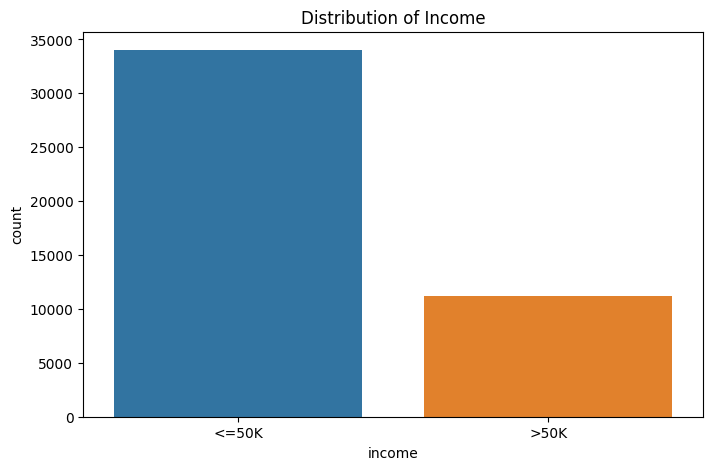

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='income')
plt.title("Distribution of Income")
plt.show()

Distribution of Numeric Features

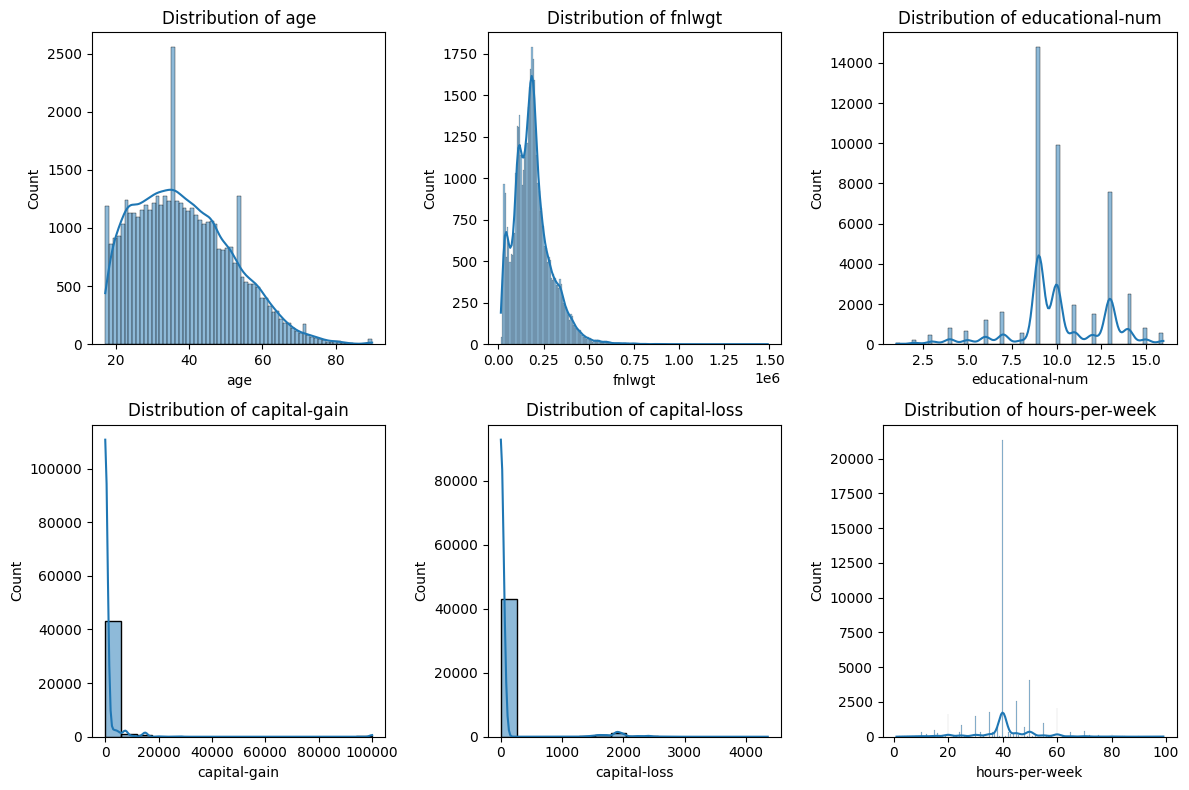

In [6]:
numeric_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

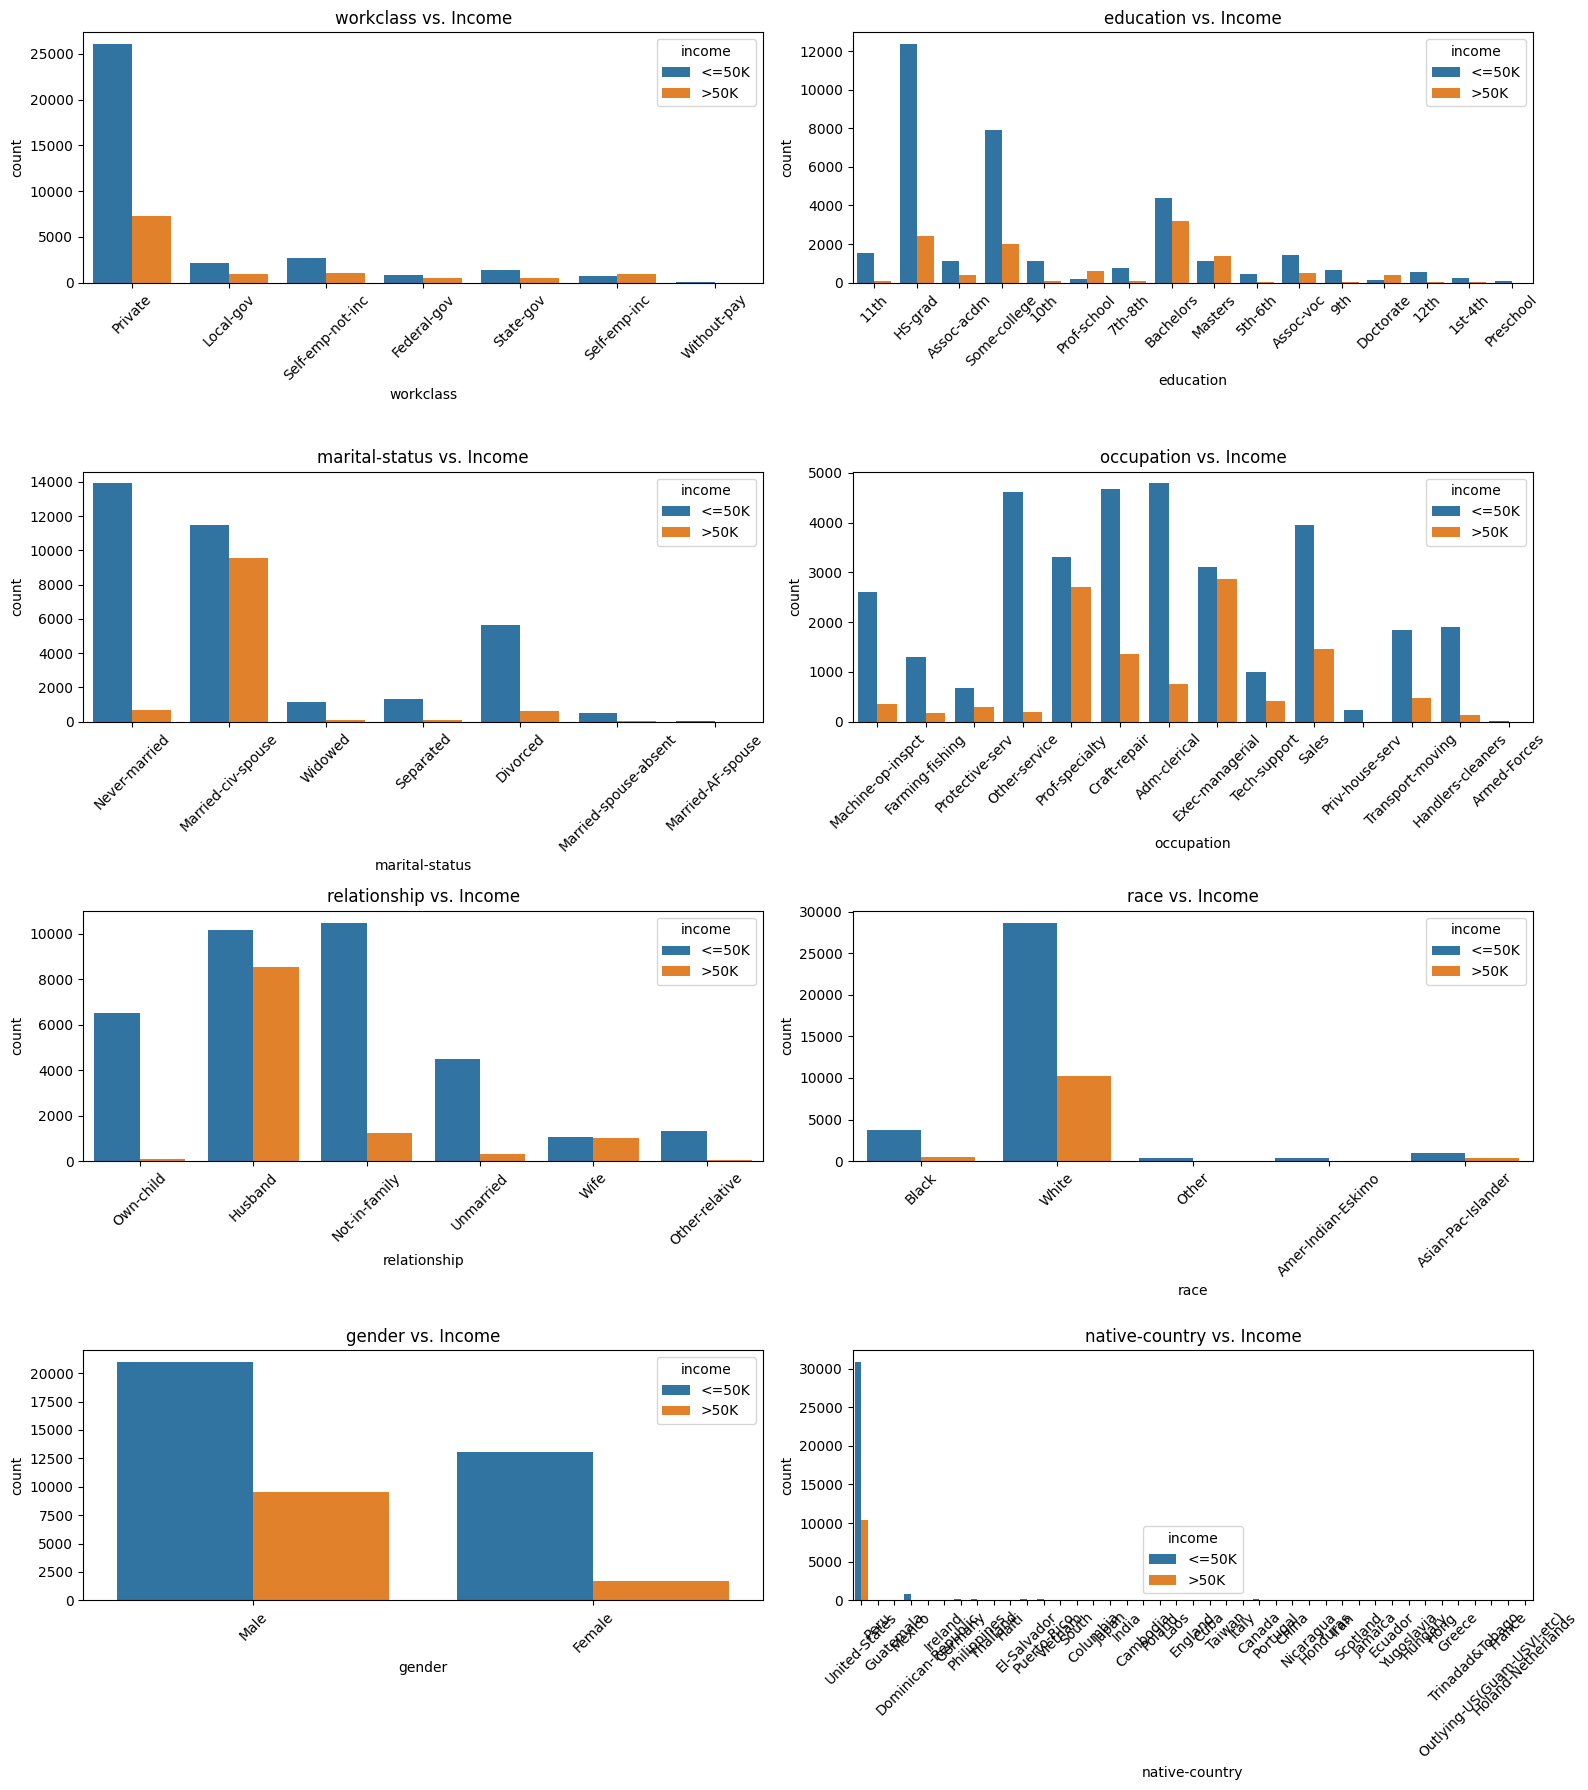

In [7]:
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

plt.figure(figsize=(16, 18))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=feature, hue='income')
    plt.title(f'{feature} vs. Income')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

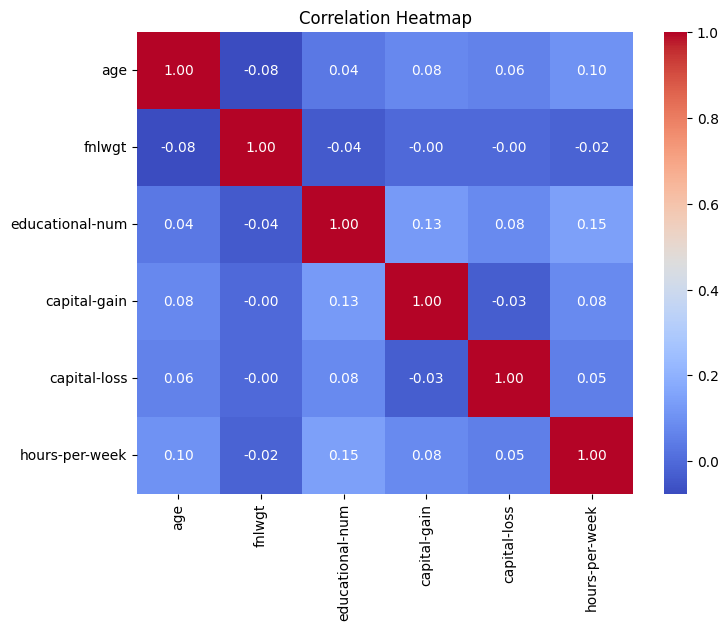

In [8]:
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Feature Engineering

In [10]:
#Example 1: Binning Age

age_bins = [0, 25, 45, 65, 100]
age_labels = ['Young', 'Middle-Aged', 'Senior', 'Elderly']
df['Age_Category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

In [11]:
# Example 2: Education Level Mapping

education_mapping = {
    'Preschool': 1, '1st-4th': 2, '5th-6th': 3, '7th-8th': 4, '9th': 5,
    '10th': 6, '11th': 7, '12th': 8, 'HS-grad': 9, 'Some-college': 10,
    'Assoc-acdm': 11, 'Assoc-voc': 12, 'Bachelors': 13, 'Masters': 14, 'Doctorate': 15
}
df['Education_Level'] = df['education'].map(education_mapping)

In [12]:
# Example 3: One-Hot Encoding for Categorical Features

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [13]:
# Example 4: Scaling Numeric Features

scaler = StandardScaler()
numeric_features += ['Education_Level']  
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [14]:
# Example 5: Encoding Income as 0 and 1

df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,Age_Category,Education_Level,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-1.024983,0.350889,-1.221559,-0.146733,-0.21878,-0.078120,0,Young,-1.226897,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.041455,-0.945878,-0.438122,-0.146733,-0.21878,0.754701,0,Middle-Aged,-0.417105,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.798015,1.393592,0.737034,-0.146733,-0.21878,-0.078120,1,Middle-Aged,0.392686,1,...,0,0,0,0,0,0,0,1,0,0
3,0.412481,-0.278420,-0.046403,0.877467,-0.21878,-0.078120,1,Middle-Aged,-0.012210,0,...,0,0,0,0,0,0,0,1,0,0
5,-0.344079,0.084802,-1.613277,-0.146733,-0.21878,-0.910942,0,Middle-Aged,-1.631793,0,...,0,0,0,0,0,0,0,1,0,0


#### Variable Transformations

In [15]:
numeric_feature = 'capital-gain'
plt.figure(figsize=(12, 24))

<Figure size 1200x2400 with 0 Axes>

<Figure size 1200x2400 with 0 Axes>

Text(0.5, 1.0, 'Q-Q Plot for Original capital-gain')

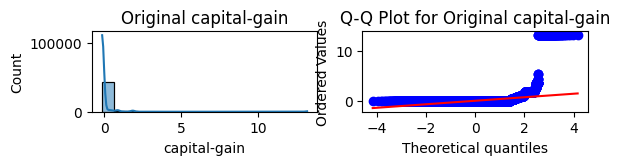

In [16]:
plt.subplot(4, 2, 1)
sns.histplot(df[numeric_feature], kde=True)
plt.title(f'Original {numeric_feature}')

plt.subplot(4, 2, 2)
stats.probplot(df[numeric_feature], dist="norm", plot=plt)
plt.title(f'Q-Q Plot for Original {numeric_feature}')

Text(0.5, 1.0, 'Q-Q Plot for Logarithm Transformed capital-gain')

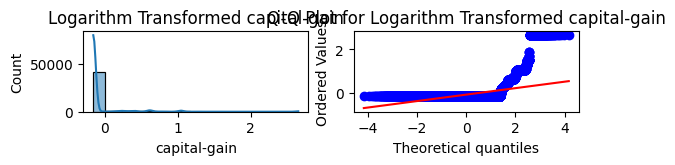

In [17]:
log_transformed = np.log(df[numeric_feature] + 1)
plt.subplot(4, 2, 3)
sns.histplot(log_transformed, kde=True)
plt.title(f'Logarithm Transformed {numeric_feature}')


plt.subplot(4, 2, 4)
stats.probplot(log_transformed, dist="norm", plot=plt)
# plt.title(f'Q-Q Plot for Logarithm Transformed {numeric_feature}')

In [18]:
# Square root transformation

sqrt_transformed = np.sqrt(df[numeric_feature])

c:\Users\UMAP\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Q-Q Plot for Square Root Transformed capital-gain')

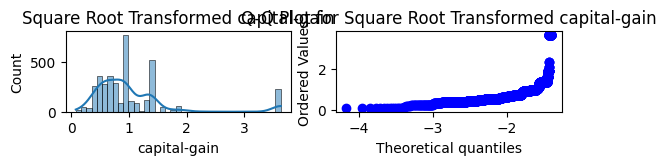

In [19]:
plt.subplot(4, 2, 5)
sns.histplot(sqrt_transformed, kde=True)
plt.title(f'Square Root Transformed {numeric_feature}')

plt.subplot(4, 2, 6)
stats.probplot(sqrt_transformed, dist="norm", plot=plt)
plt.title(f'Q-Q Plot for Square Root Transformed {numeric_feature}')

Text(0.5, 1.0, 'Q-Q Plot for Reciprocal Transformed capital-gain')

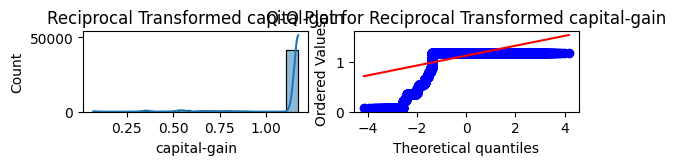

In [20]:
reciprocal_transformed = 1 / (df[numeric_feature] + 1)
plt.subplot(4, 2, 7)
sns.histplot(reciprocal_transformed, kde=True)
plt.title(f'Reciprocal Transformed {numeric_feature}')

plt.subplot(4, 2, 8)
stats.probplot(reciprocal_transformed, dist="norm", plot=plt)
plt.title(f'Q-Q Plot for Reciprocal Transformed {numeric_feature}')

Text(0.5, 1.0, 'Q-Q Plot for Exponential Transformed capital-gain')

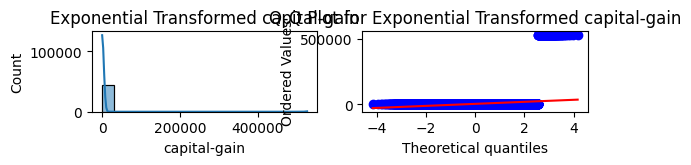

In [21]:
exp_transformed = np.exp(df[numeric_feature])
plt.subplot(4, 2, 7)  # Use 7 for the histogram
sns.histplot(exp_transformed, kde=True)
plt.title(f'Exponential Transformed {numeric_feature}')

plt.subplot(4, 2, 8)  # Use 8 for the Q-Q plot
stats.probplot(exp_transformed, dist="norm", plot=plt)
plt.title(f'Q-Q Plot for Exponential Transformed {numeric_feature}')

In [22]:
X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

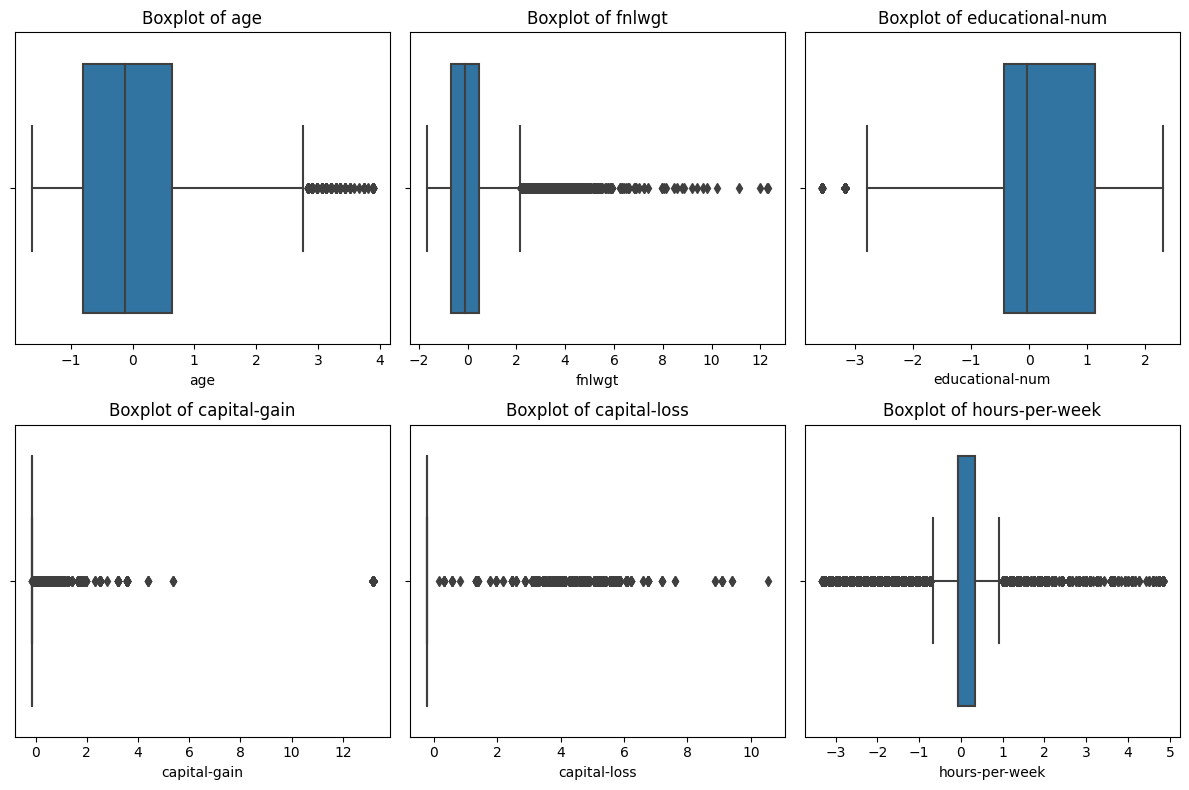

In [23]:
numeric_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [24]:
Q1 = df[numeric_feature].quantile(0.25)
Q3 = df[numeric_feature].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [25]:
# Remove outliers

df = df[(df[numeric_feature] >= lower_bound) & (df[numeric_feature] <= upper_bound)]


# Verify that outliers have been removed

print(f"Number of rows after removing outliers: {len(df)}")

Number of rows after removing outliers: 41432
